In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.read_csv('/content/new_student_clustering.csv')
df


,x,y
0,45.00,88
1,68.00,113
2,106.00,93
3,75.00,97
4,208.00,110
5,5.88,109
6,180.00,98
7,8.80,115
8,250.00,110
9,309.00,94


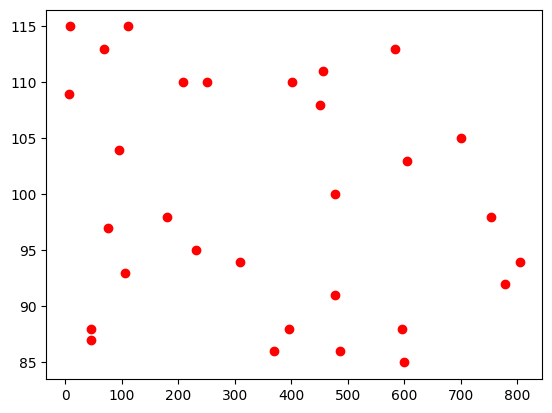

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['x'],df['y'], c = 'r')

In [4]:
k = int(input("Enter the number of clusters: "))


Enter the number of clusters: 4


In [5]:
X = np.array(df.astype(np.int64))


In [6]:
import random # generate random number
import numpy as np #used for numerical computatiom

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters) # range [0, number of data points in X)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X) # assign_clusters method, which assigns each data point in X to the nearest centroid.
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

            # plot current iteration
            self.plot_clusters(X, cluster_group, i)

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for cluster_type in cluster_type:
            new_centroids.append(X[cluster_group == cluster_type].mean(axis=0))

        return np.array(new_centroids)

    def plot_clusters(self, X, cluster_group, iteration):
        plt.figure()
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i in range(self.n_clusters):
            cluster_points = X[cluster_group == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i])
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='k', marker='*', s = 150)
        plt.title(f"Iteration {iteration}")
        plt.show()


    def assign_new_point(self, point):
        distances = []
        for centroid in self.centroids:
            distances.append(np.sqrt(np.dot(point - centroid, point - centroid)))
        min_distance = min(distances)
        cluster_index = distances.index(min_distance)
        return cluster_index


In [7]:
km =  KMeans(k, 10)

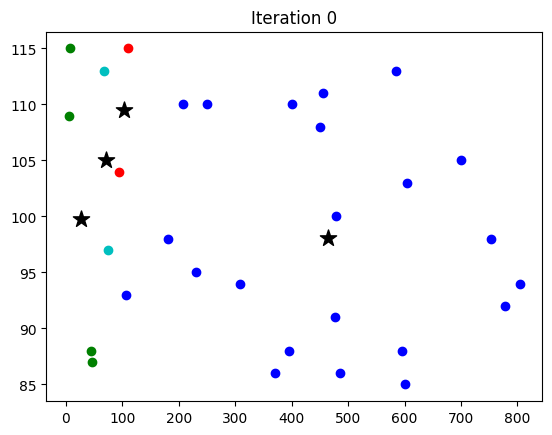

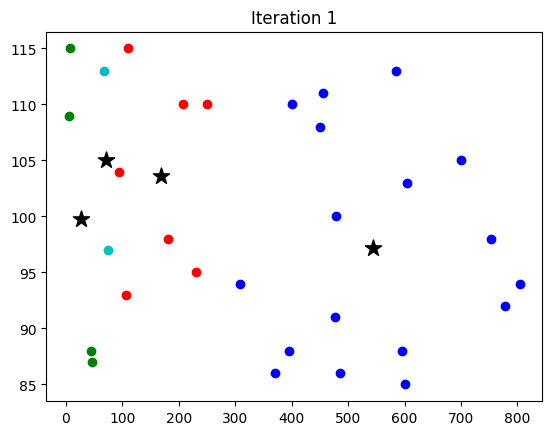

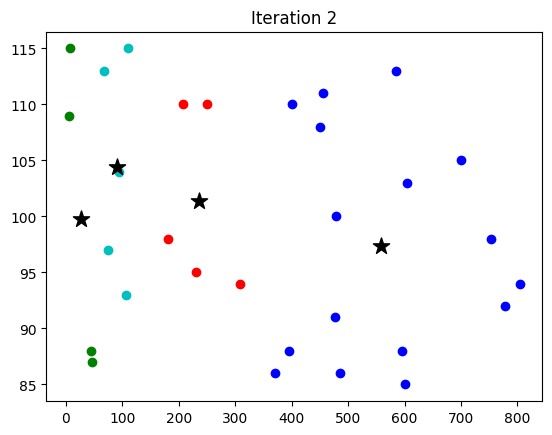

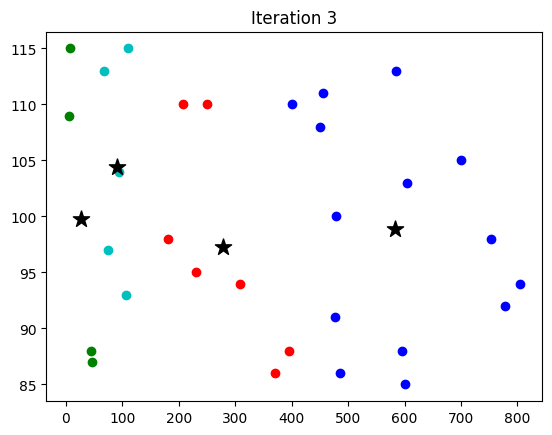

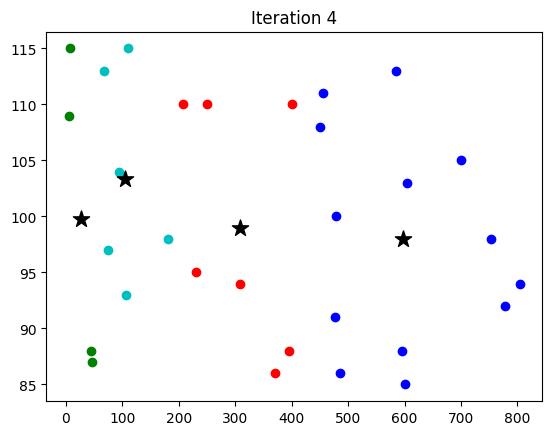

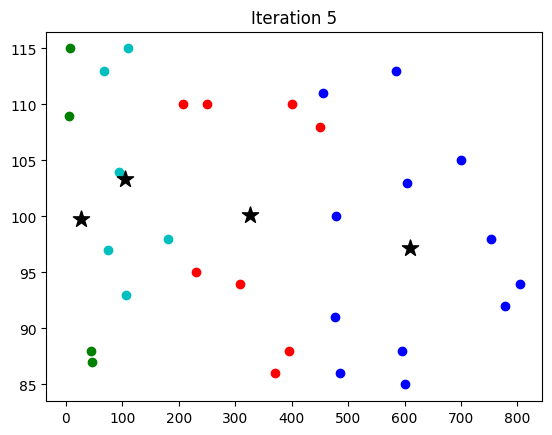

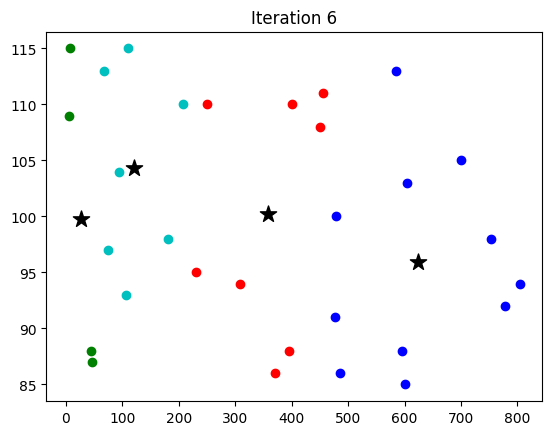

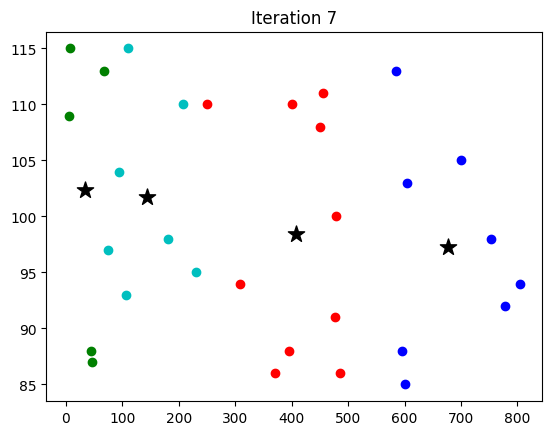

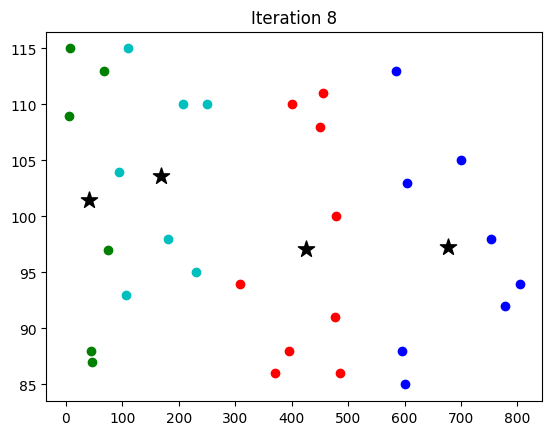

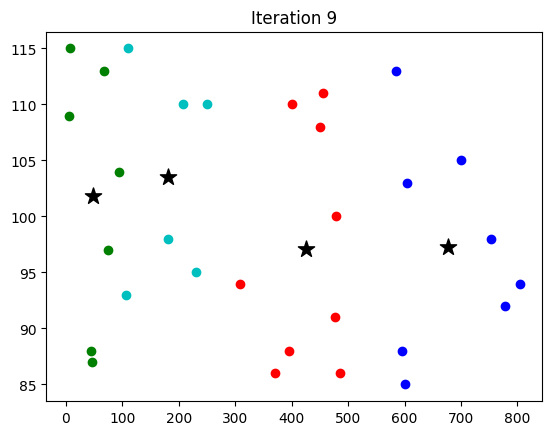

[1 1 3 1 3 1 3 1 3 0 0 0 1 0 0 3 0 0 2 2 2 0 2 0 2 2 1 2 2 3]


In [8]:
cluster_labels = km.fit_predict(X)
print(cluster_labels)


In [9]:
new_x = float(input())
new_y = float(input())

new_point = np.array([new_x, new_y])
assigned_cluster = km.assign_new_point(new_point)
print("New point assigned to cluster:", assigned_cluster)

500
102
New point assigned to cluster: 0
